Requirements

In [1]:
# 1. Import pandas, matplotlib, seaborn, sklearn libraries
# 2. Read csv file named as iris.csv
# 3. Show first five records
# 4. Show a dataframe which has sepal width greater than 4
# 5. Show a dataframe which has petal width greater than 1
# 6. Retrieve records which have petal width more than 2
# 7. Figure out the relationship between sepal length and petal length and draw a scatter plot between them and show the relationship between them
# 8. Now apply species as hue in the same scatter plot for better visibility and understanding


Model 1

In [2]:
# 1. Create an object named as y which is storing the dataframe of a dependent variable names as 'sepallengthcm'
# 2. Create an object named as x which is storing the dataframe of an independent variable names as 'sepalwidthcm'
# 3. Divide the variables into x_train,x_test,y_train,y_test variables using train_test_split method carrying parameters named as x,y and test size should be 30%
# 4. Show first five records of all four variables / objects
# 5. Create an object named as lr and assign memory from linearregression() method.
# 6. Fit both training set into fit method
# 7. Predict x_test from predict method and store the result into y_pred object
# 8. Show first five records from actual and predicted objects
# 9. Try to find out mean_squared_error in prediction using method after passing parameter as y_test and y_pred ,mind the result

Model 2

In [3]:
# 1. Create an object named as y and store dataframe of sepallengthcm dependent variable
# 2. Store 'sepalwidthcm', 'petallengthcm', 'petalwidthcm' dataframe in x as an independent variables
# 3. Do train_test_split like you did in model 1 this time test_size is again 30%
# 4. Fit both train set into fit method of linearregression
# 5. Predict x_test and store result into y_pred using predict method
# 6. Find out mean_squared_error of actual and predicted test set
# 7. Describe which model is better and why?

1. Import pandas, matplotlib, seaborn, sklearn libraries

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report

2. Read csv file named as iris.csv

In [5]:
df = pd.read_csv('iris.csv')

In [6]:
#no data cleaning needed for this project
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

3. Show first five records

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


4. Show a dataframe which has sepal width greater than 4

In [9]:
df[df['SepalWidthCm'] > 4]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa


5. Show a dataframe which has petal width greater than 1

In [10]:
df[df['PetalWidthCm'] > 1]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


6. Retrieve records which have petal width more than 2

In [11]:
df[df['PetalWidthCm'] > 2]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
115,116,6.4,3.2,5.3,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica


7. Figure out the relationship between sepal length and petal length and draw a scatter plot between them and show the relationship between them

In [41]:
np.corrcoef(x=df['SepalLengthCm'], y=df['PetalLengthCm'])[0][1]

0.8717541573048712

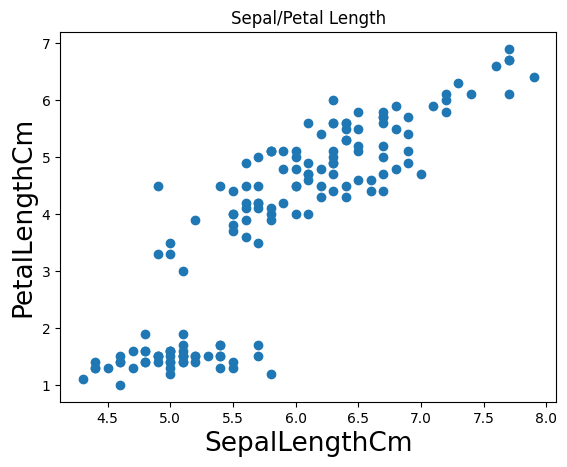

In [12]:
plt.scatter(x=df['SepalLengthCm'], y=df['PetalLengthCm'])
plt.title('Sepal/Petal Length')
plt.xlabel('SepalLengthCm', fontsize=19)
plt.ylabel('PetalLengthCm', fontsize=19)
plt.show()

8. Now apply species as hue in the same scatter plot for better visibility and understanding

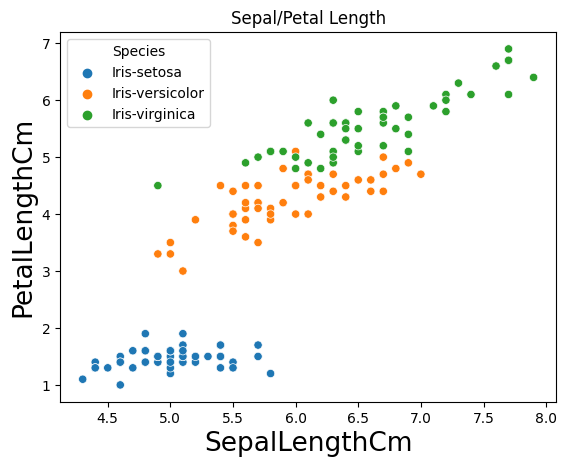

In [13]:
sns.scatterplot(data=df, x=df['SepalLengthCm'], y=df['PetalLengthCm'], hue=df['Species'])
plt.title('Sepal/Petal Length')
plt.xlabel('SepalLengthCm', fontsize=19)
plt.ylabel('PetalLengthCm', fontsize=19)
plt.show()

Model 1

1. Create an object named as y which is storing the dataframe of a dependent variable names as 'sepallengthcm'

In [14]:
y = df[['SepalLengthCm']]

2. Create an object named as x which is storing the dataframe of an independent variable names as 'sepalwidthcm'

In [15]:
x = df[['SepalWidthCm']]

3. Divide the variables into x_train,x_test,y_train,y_test variables using train_test_split method carrying parameters named as x,y and test size should be 30%

In [16]:
#this will split the data set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

4. Show first five records of all four variables / objects

In [17]:
print(x_train.head())
print(x_test.head())
print(y_train.head())
print(y_test.head())

     SepalWidthCm
87            2.3
89            2.5
137           3.1
117           3.8
94            2.7
     SepalWidthCm
7             3.4
119           2.2
65            3.1
34            3.1
74            2.9
     SepalLengthCm
87             6.3
89             5.5
137            6.4
117            7.7
94             5.6
     SepalLengthCm
7              5.0
119            6.0
65             6.7
34             4.9
74             6.4


5. Create an object named as lr and assign memory from linearregression() method.

In [18]:
lr = LinearRegression()

6. Fit both training set into fit method

In [19]:
lr.fit(x_train, y_train)

LinearRegression()

7. Predict x_test from predict method and store the result into y_pred object

In [20]:
y_pred = lr.predict(x_test)

8. Show first five records from actual and predicted objects

In [21]:
y_pred[0:5]

array([[5.75804755],
       [6.02637182],
       [5.82512862],
       [5.82512862],
       [5.86984933]])

9. Try to find out mean_squared_error in prediction using method after passing parameter as y_test and y_pred ,mind the result

In [22]:
mean_squared_error(y_test, y_pred)

0.6313736812721252

Model 2

1. Create an object named as y and store dataframe of sepallengthcm dependent variable

In [42]:
lr2 = LinearRegression()

In [43]:
y = df[['SepalLengthCm']]

2. Store 'sepalwidthcm', 'petallengthcm', 'petalwidthcm' dataframe in x as an independent variables

In [44]:
x = df[['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

3. Do train_test_split like you did in model 1 this time test_size is again 30%

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

4. Fit both train set into fit method of linearregression

In [46]:
lr2.fit(x_train, y_train)

LinearRegression()

5. Predict x_test and store result into y_pred using predict method

In [49]:
y_pred = lr2.predict(x_test)
y_pred[0:5]

array([[4.89867779],
       [6.37725572],
       [4.96298824],
       [4.68186866],
       [6.11691777]])

6. Find out mean_squared_error of actual and predicted test set

In [52]:
mean_squared_error(y_test, y_pred)

0.11569343922804164

7. Describe which model is better and why?

- Model 2 has a much smaller margin of error

Extensions

petal length vs petal width

In [32]:
#plots for this demonstration
x = df[['PetalLengthCm']]
y = df[['PetalWidthCm']]
#split test and train
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

lr3 = LinearRegression()

lr3.fit(x_train,y_train)
#analyzing when in training
#also to note that predict is doing y = mx+b
x_train1 = lr3.predict(x_train)
#analyzing when predicting
y_pred2 = lr3.predict(x_test)

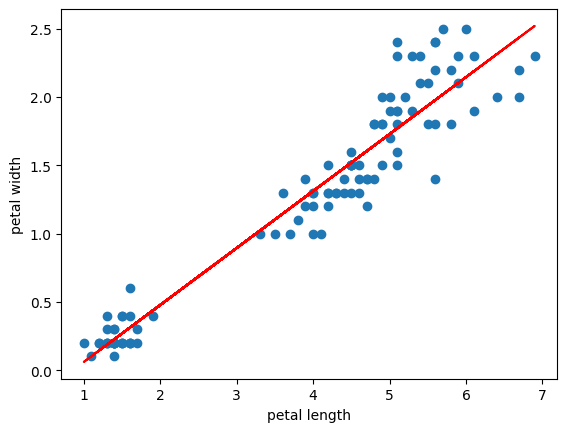

In [33]:
plt.scatter(x_train, y_train)
#
plt.plot(x_train, x_train1,  color='r')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

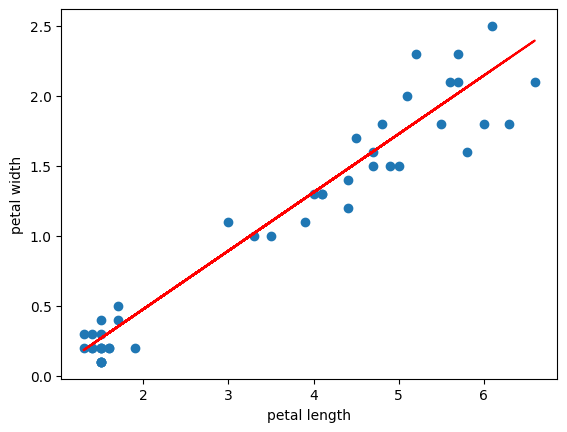

In [34]:
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test)
#changes train to test and the new predictions
plt.plot(x_test, y_pred2,  color='r')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

DecisionTreeClassifier Example

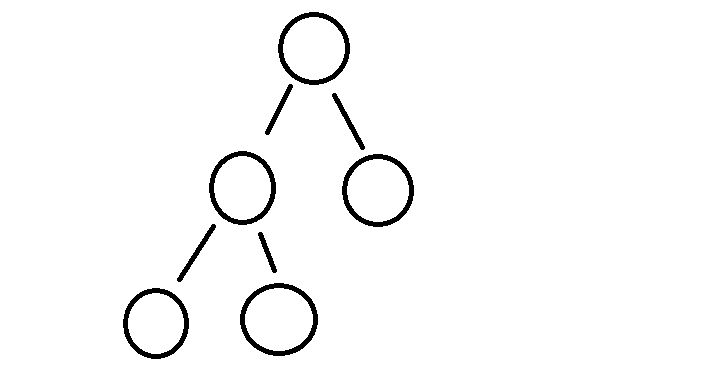

In [35]:
Image(filename='images/tree.png')

In [54]:
x = df[['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm']]
y = df[['Species']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# DecisionTreeClassifier for this demonstration
dtc = DecisionTreeClassifier()

# Train the classifier on the training data
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

# Test the classifier on the test data
score = dtc.score(x_test, y_test)

print(f"Accuracy: {score * 100}%")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Using the RandomForestClassifier

In [37]:
x = df[['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm']]
y = df[['Species']]
#y has to be shaped to its specific column y['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y['Species'], test_size=0.2)

# estimators can be interpreted as number of trees created
rfc = RandomForestClassifier(n_estimators=50)

# Train the classifier on the training set
rfc.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(x_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy * 100:.2f}%") 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 93.33%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.80      1.00      0.89         8
 Iris-virginica       1.00      0.88      0.94        17

       accuracy                           0.93        30
      macro avg       0.93      0.96      0.94        30
   weighted avg       0.95      0.93      0.93        30

[[ 5  0  0]
 [ 0  8  0]
 [ 0  2 15]]
